Accuracy: 80.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00      0.80         2
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1

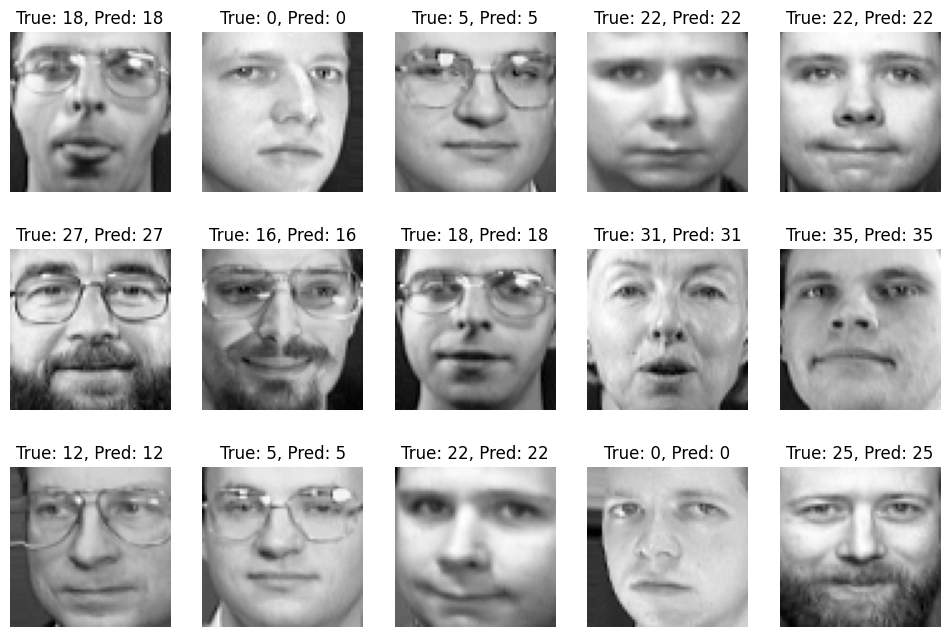

In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cross_val_accuracy = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print(f'\nCross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%')

fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for ax, image, label, prediction in zip(axes.ravel(), X_test, y_test, y_pred):
    ax.imshow(image.reshape(64, 64), cmap=plt.cm.gray)
    ax.set_title(f"True: {label}, Pred: {prediction}")
    ax.axis('off')

plt.show()

Accuracy: 0.9125

Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]] 

Classification Report:
               precision    recall  f1-score   support

    person_0       1.00      0.50      0.67         2
    person_1       1.00      0.50      0.67         2
    person_2       0.50      0.50      0.50         2
    person_3       0.50      1.00      0.67         2
    person_4       1.00      1.00      1.00         2
    person_5       1.00      1.00      1.00         2
    person_6       1.00      1.00      1.00         2
    person_7       0.67      1.00      0.80         2
    person_8       1.00      1.00      1.00         2
    person_9       1.00      0.50      0.67         2
   person_10       1.00      1.00      1.00         2
   person_11       1.00      1.00      1.00         2
   person_12       1.00      0.50      0.67         2
   person_13       1.00      1.00      1.00         2
   per

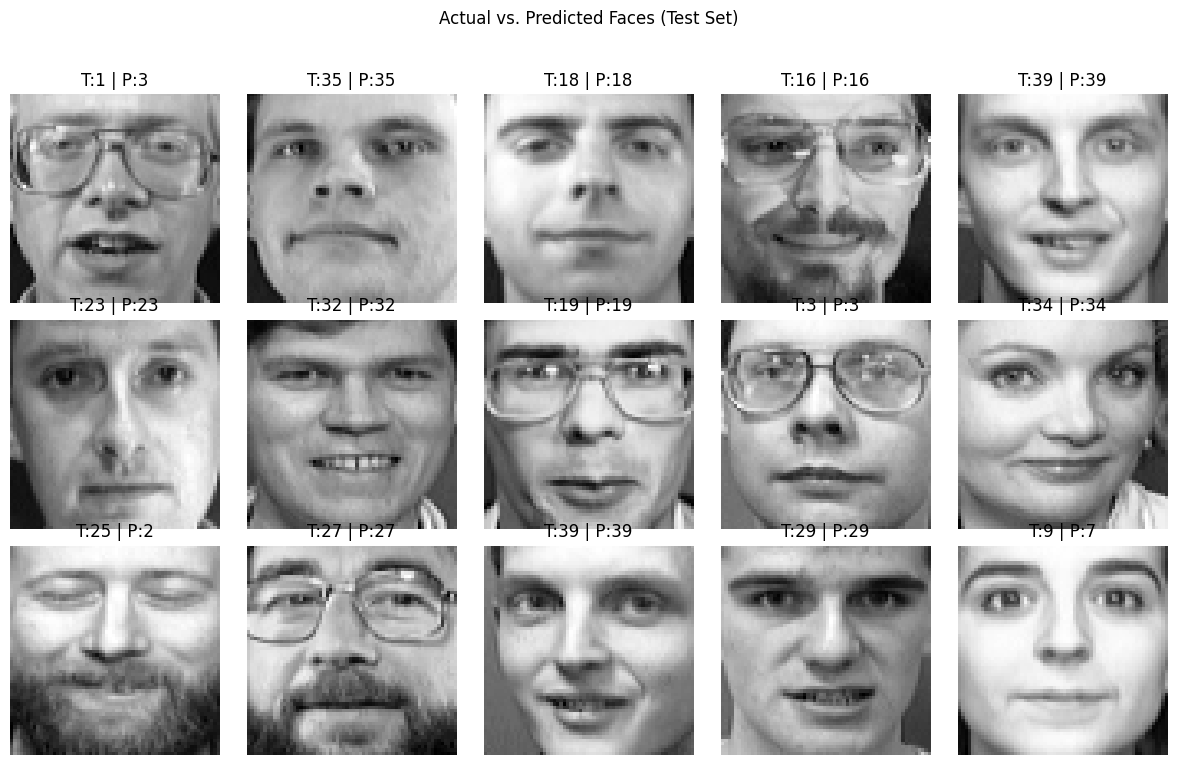

In [3]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

def classify_olivetti_faces(test_size=0.2, random_state=42):
    data = fetch_olivetti_faces(shuffle=True, random_state=random_state)
    X_train, X_test, y_train, y_test = train_test_split(
        data.data, data.target, test_size=test_size, random_state=random_state, stratify=data.target
    )

    model = GaussianNB().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
    print("Classification Report:\n", classification_report(
        y_test, y_pred, target_names=[f"person_{i}" for i in np.unique(data.target)]
    ))

    fig, axes = plt.subplots(3, 5, figsize=(12, 8))
    fig.suptitle("Actual vs. Predicted Faces (Test Set)")
    for i, ax in enumerate(axes.ravel()[:15]):
        ax.imshow(X_test[i].reshape(64, 64), cmap='gray')
        ax.set_title(f"T:{y_test[i]} | P:{y_pred[i]}")
        ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return acc

if __name__ == "__main__":
    classify_olivetti_faces()
